In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!ls data/SST2

dev.tsv   test.tsv  train.tsv


In [8]:
colnames=['text', 'sentiment'] 

dev = pd.read_csv('data/SST2/dev.tsv', names=colnames, sep='\t')
test = pd.read_csv('data/SST2/test.tsv', names=colnames, sep='\t')
train = pd.read_csv('data/SST2/train.tsv', names=colnames, sep='\t')

In [12]:
train[train.sentiment==0].text.values

array(['apparently reassembled from the cutting room floor of any given daytime soap',
       "they presume their audience wo n't sit still for a sociology lesson , however entertainingly presented , so they trot out the conventional science fiction elements of bug eyed monsters and futuristic women in skimpy clothes",
       'a fan film that for the uninitiated plays better on video with the sound turned down',
       ...,
       'take care is nicely performed by a quintet of actresses , but nonetheless it drags during its 112 minute length',
       "the script covers huge , heavy topics in a bland , surfacey way that does n't offer any insight into why , for instance , good things happen to bad people",
       'a seriously bad film with seriously warped logic by writer director kurt wimmer at the screenplay level'],
      dtype=object)

In [13]:
female_words = ['woman', 'women', 'she', 'girl', 'girls', 'female', 'mother', 
                'daughter', 'sister', 'aunt', 'grandmother', 'her', 'hers']
male_words = ['man', 'men', 'he', 'boy', 'boys', 'male', 'father', 'son', 'brother', 
              'uncle', 'grandfather', 'him', 'his']

In [18]:
mapping = dict(zip(female_words+male_words, male_words+female_words))

In [19]:
mapping

{'woman': 'man',
 'women': 'men',
 'she': 'he',
 'girl': 'boy',
 'girls': 'boys',
 'female': 'male',
 'mother': 'father',
 'daughter': 'son',
 'sister': 'brother',
 'aunt': 'uncle',
 'grandmother': 'grandfather',
 'her': 'him',
 'hers': 'his',
 'man': 'woman',
 'men': 'women',
 'he': 'she',
 'boy': 'girl',
 'boys': 'girls',
 'male': 'female',
 'father': 'mother',
 'son': 'daughter',
 'brother': 'sister',
 'uncle': 'aunt',
 'grandfather': 'grandmother',
 'him': 'her',
 'his': 'hers'}

In [49]:
gendered_terms = []
gendered_sentences = 0

for sentence in train.text.values:
    g_terms = []
    for key in mapping:
        if key in sentence.split(' '):
            g_terms.append(key)
    if len(g_terms) != 0:
        gendered_sentences+=1
    gendered_terms.append(g_terms)
    
train["gendered_terms"] = gendered_terms

In [50]:
gendered_sentences

809

In [51]:
train.tail(20)

,text,sentiment,gendered_terms
6900,a terrific insider look at the star making mac...,1,[]
6901,"the movie is amateurish , but it 's a minor treat",1,[]
6902,it is n't scary,0,[]
6903,"a preposterous , prurient whodunit",0,[]
6904,they are what makes it worth the trip to the t...,1,[]
6905,chan 's stunts are limited and so embellished ...,0,[]
6906,an average kid empowerment fantasy with slight...,1,[]
6907,"instead of making his own style , director mar...",0,[his]
6908,the plot of the comeback curlers is n't very i...,1,[men]
6909,tambor and clayburgh make an appealing couple ...,1,"[she, he]"


In [52]:
from functools import reduce
all_gendered_terms = reduce(lambda z, y :z + y, gendered_terms)
all_gendered_terms[:10]

['women', 'his', 'man', 'man', 'he', 'man', 'he', 'her', 'his', 'he']

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


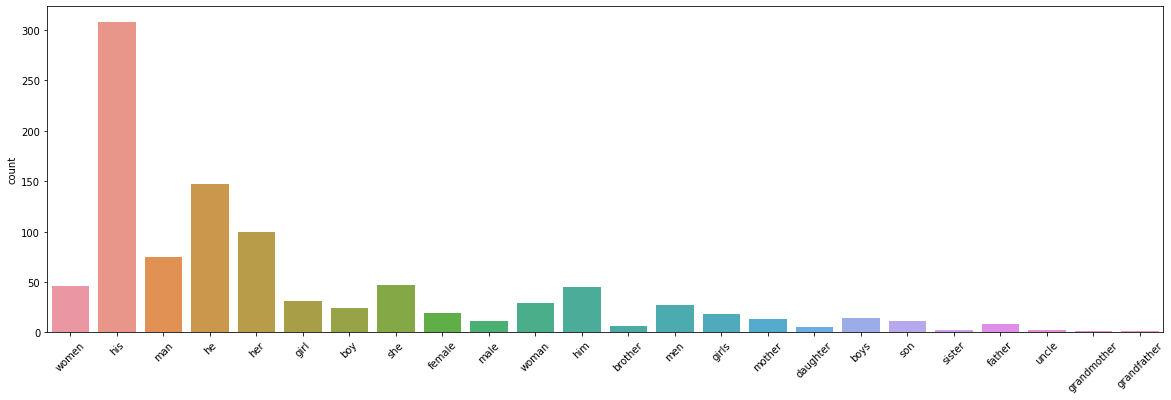

In [53]:
plt.figure(figsize=(20, 6))
sns.countplot(all_gendered_terms)
plt.xticks(rotation=45)
plt.show()

In [54]:
flipped_sentences = []

for sentence in train.text.values:
    final_sentence = []
    sent = sentence.split(' ')
    for word in sent:
        if word in mapping:
            final_sentence.append(mapping[word])
        else:
            final_sentence.append(word)
    flipped_sentences.append(' '.join(final_sentence))            

In [56]:
train["flipped_sentences"] = flipped_sentences

In [57]:
train

,text,sentiment,gendered_terms,flipped_sentences
0,"a stirring , funny and finally transporting re...",1,[],"a stirring , funny and finally transporting re..."
1,apparently reassembled from the cutting room f...,0,[],apparently reassembled from the cutting room f...
2,they presume their audience wo n't sit still f...,0,[women],they presume their audience wo n't sit still f...
3,this is a visually stunning rumination on love...,1,[],this is a visually stunning rumination on love...
4,jonathan parker 's bartleby should have been t...,1,[],jonathan parker 's bartleby should have been t...
...,...,...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1,[],"painful , horrifying and oppressively tragic ,..."
6916,take care is nicely performed by a quintet of ...,0,[],take care is nicely performed by a quintet of ...
6917,"the script covers huge , heavy topics in a bla...",0,[],"the script covers huge , heavy topics in a bla..."
6918,a seriously bad film with seriously warped log...,0,[],a seriously bad film with seriously warped log...


In [59]:
gendered_terms_flipped = []

for sentence in train.flipped_sentences.values:
    g_terms = []
    for key in mapping:
        if key in sentence.split(' '):
            g_terms.append(key)
    gendered_terms_flipped.append(g_terms)
    
train["gendered_terms_flipped"] = gendered_terms_flipped

In [60]:
train

,text,sentiment,gendered_terms,flipped_sentences,gendered_terms_flipped
0,"a stirring , funny and finally transporting re...",1,[],"a stirring , funny and finally transporting re...",[]
1,apparently reassembled from the cutting room f...,0,[],apparently reassembled from the cutting room f...,[]
2,they presume their audience wo n't sit still f...,0,[women],they presume their audience wo n't sit still f...,[men]
3,this is a visually stunning rumination on love...,1,[],this is a visually stunning rumination on love...,[]
4,jonathan parker 's bartleby should have been t...,1,[],jonathan parker 's bartleby should have been t...,[]
...,...,...,...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1,[],"painful , horrifying and oppressively tragic ,...",[]
6916,take care is nicely performed by a quintet of ...,0,[],take care is nicely performed by a quintet of ...,[]
6917,"the script covers huge , heavy topics in a bla...",0,[],"the script covers huge , heavy topics in a bla...",[]
6918,a seriously bad film with seriously warped log...,0,[],a seriously bad film with seriously warped log...,[]


In [62]:
train.to_csv('train_flipped.tsv', sep='\t')